In [6]:
#Importamos bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#Llamamos al archivo csv
bk = pd.read_csv("train_set.csv")

In [15]:
#Realizamos análisis exploratorio
bk.head()

,user_id,checkin,checkout,city_id,device_class,affiliate_id,booker_country,hotel_country,utrip_id
0,1000027,2016-08-13,2016-08-14,8183,desktop,7168,Elbonia,Gondal,1000027_1
1,1000027,2016-08-14,2016-08-16,15626,desktop,7168,Elbonia,Gondal,1000027_1
2,1000027,2016-08-16,2016-08-18,60902,desktop,7168,Elbonia,Gondal,1000027_1
3,1000027,2016-08-18,2016-08-21,30628,desktop,253,Elbonia,Gondal,1000027_1
4,1000033,2016-04-09,2016-04-11,38677,mobile,359,Gondal,Cobra Island,1000033_1


In [16]:
bk.shape

(1166835, 9)

In [17]:
bk.columns

Index(['user_id', 'checkin', 'checkout', 'city_id', 'device_class',
       'affiliate_id', 'booker_country', 'hotel_country', 'utrip_id'],
      dtype='object')

In [18]:
bk.dtypes

user_id            int64
checkin           object
checkout          object
city_id            int64
device_class      object
affiliate_id       int64
booker_country    object
hotel_country     object
utrip_id          object
dtype: object

In [19]:
bk.isna().sum()

user_id           0
checkin           0
checkout          0
city_id           0
device_class      0
affiliate_id      0
booker_country    0
hotel_country     0
utrip_id          0
dtype: int64

In [20]:
bk.isnull().sum()

user_id           0
checkin           0
checkout          0
city_id           0
device_class      0
affiliate_id      0
booker_country    0
hotel_country     0
utrip_id          0
dtype: int64

In [21]:
bk.head()

,user_id,checkin,checkout,city_id,device_class,affiliate_id,booker_country,hotel_country,utrip_id
0,1000027,2016-08-13,2016-08-14,8183,desktop,7168,Elbonia,Gondal,1000027_1
1,1000027,2016-08-14,2016-08-16,15626,desktop,7168,Elbonia,Gondal,1000027_1
2,1000027,2016-08-16,2016-08-18,60902,desktop,7168,Elbonia,Gondal,1000027_1
3,1000027,2016-08-18,2016-08-21,30628,desktop,253,Elbonia,Gondal,1000027_1
4,1000033,2016-04-09,2016-04-11,38677,mobile,359,Gondal,Cobra Island,1000033_1


In [23]:
#Qué frecuencia relativa tiene cada país
bk["hotel_country"].value_counts(normalize=True)

hotel_country
Cobra Island    1.180895e-01
Fook Island     1.008857e-01
Gondal          8.996902e-02
Glubbdubdrib    6.413932e-02
Elbonia         4.624904e-02
                    ...     
Nuevo Rico      8.570192e-07
New Germany     8.570192e-07
Medici          8.570192e-07
Utopia          8.570192e-07
Norteguay       8.570192e-07
Name: proportion, Length: 195, dtype: float64

In [31]:
#Qué países hay
paises = bk["hotel_country"].unique()
print(paises)

['Gondal' 'Cobra Island' 'Fook Island' 'Carpathia' 'Osterlich' 'Kamistan'
 'Kangan' 'Rook Islands' 'Bartovia' 'Leutonia' 'Urkesh' 'Patusan'
 'Glubbdubdrib' 'Alvonia' 'Elbonia' 'San Sombrèro' 'Novistrana' 'Aldovia'
 'Palombia' 'Trans-Carpathia' 'Genosha' 'Santa Prisca' 'Borginia'
 'Carjackistan' 'Dawsbergen' 'Axphain' 'Holy Britannian Empire' 'Idris'
 'Sokovia' 'Norland' 'Syldavia' 'Sylvania' 'Mypos' 'Chernarus' 'Rolisica'
 'Drusselstein' 'Yerba' 'Kasnia' 'São Rico' 'The Devilfire Empire'
 'Republic of New Rearendia' 'Grinlandia' 'Turgistan' 'Edonia' 'Bozatta'
 'Grand Fenwick' 'Pullamawang' 'Bahavia' 'Panem' 'Merania, Kingdom of'
 'Zephyria' 'Marina Venetta' 'Brobdingnag' 'Kumbolaland' 'Nova Africa'
 'Svenborgia' 'Lilliput' 'Bultan' 'Robo-Hungarian Empire' 'Nevoruss'
 'Aslerfan' 'Tcherkistan' 'Oceania' 'Uqbar' 'San Marcos' 'Bahari'
 'Slovetzia' 'Atlantis' 'Pokrovia' 'Durhan' 'Slaka'
 'Russian Democratic Union' 'Coalition States' 'North American Union'
 'Gérolstein' 'Ragaan' 'Borostyria'

In [33]:
#Cantidad de reservas por país
reservas_por_pais = bk['hotel_country'].value_counts()
print(reservas_por_pais)

hotel_country
Cobra Island    137791
Fook Island     117717
Gondal          104979
Glubbdubdrib     74840
Elbonia          53965
                 ...  
Nuevo Rico           1
New Germany          1
Medici               1
Utopia               1
Norteguay            1
Name: count, Length: 195, dtype: int64


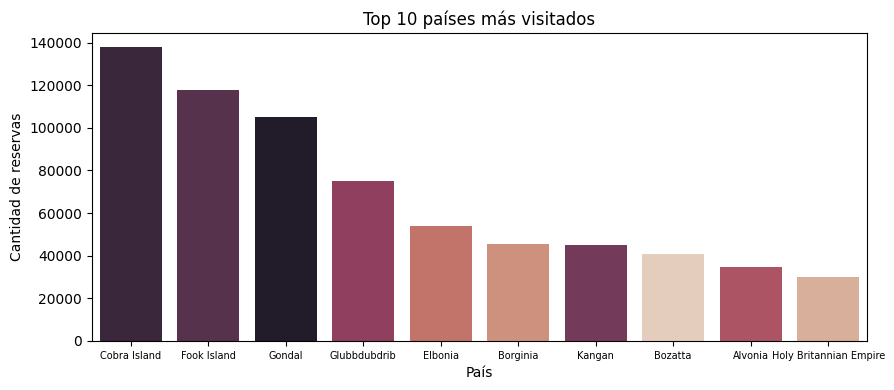

In [115]:
# Seaborn
# Filtro los 10 países con más reservas en seaborn para que sea legible
# Obtener los 10 países más visitados

top_10_paises = bk['hotel_country'].value_counts().head(10).index.tolist()
bk_top_10 = bk[bk['hotel_country'].isin(top_10_paises)]
plt.figure(figsize=(10, 4))  # Tamaño opcional del gráfico va primero
sns.countplot(data=bk_top_10, x="hotel_country", y=None, hue="hotel_country", order=top_10_paises, palette="rocket", saturation=0.5, fill=True, hue_norm=None, stat='count', width=0.8, dodge='auto', gap=0, log_scale=None, native_scale=False, formatter=None, legend='auto', ax=None)
plt.xlabel('País')
plt.ylabel('Cantidad de reservas')
plt.title('Top 10 países más visitados')
plt.xticks(rotation=0, fontsize=7)
plt.show()

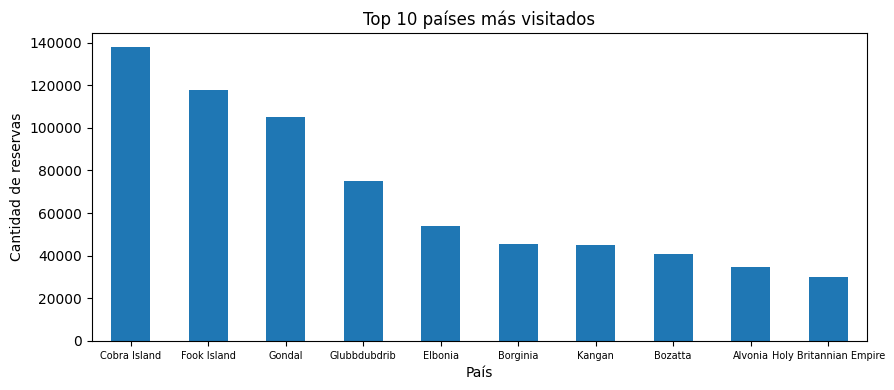

In [92]:
#Matplotlib
#debe ir primero el figure size antes de crearse el plot, en pulgadas, ancho y alto
plt.figure(figsize=(10, 4)) 
bk['hotel_country'].value_counts().head(10).plot(kind='bar')
plt.xlabel('País')
plt.ylabel('Cantidad de reservas')
plt.title('Top 10 países más visitados')
plt.xticks(rotation=0, fontsize=7)
plt.show()